# Convolutions and Probability

The [Why Are Convolutions Useful?](Why%20Are%20Convolutions%20Useful%3F.ipynb) notebook focuses on the role of convolutions in signal processing, with connections to neuroscience. But as noted in the [What's a Convolution?](What's%20a%20Convolution%3F.ipynb) notebook, convolutions are a very general mathematical idea -- much more than a simple way of expressing what linear, time-invariant transformations do to signals. In fact, they arise whenever we need to keep track of multiple possible contributions to a given value.

This notebook works through an example of how convolutions arise in this way in probability theory. It assumes a small degree of familiarity with convolutions (so read through the other notebooks first!) and probability. If your probability is rusty, I recommend [this blog post on Bayes' Rule](http://charlesfrye.github.io/stats/2016/02/04/bayes-rule.html), which begins with a primer on probability.

In [77]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

import time
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)
                
def setupRun(pmf,iters):
    pmfs = [pmf]
    xMax = iters*(len(pmf)-1)
    xLocations = list(range(xMax+2))
    xLabels = [str(loc) if (loc%(len(pmf)-1))==0 else '' for loc in xLocations]
    extendedPMF = np.hstack([pmfs[0],[0]*(xMax+2-len(pmfs[0]))])
    edge = 2
    fig = plt.figure(figsize=(12,6)); pmfAx = plt.subplot(111)
    pmfBars = pmfAx.bar(xLocations,extendedPMF,width=1,align='center',alpha=0.8,
                       linewidth=0,)

    setupPlot(plt.gca(),xLocations,edge,xLabels)
    
    plt.suptitle("Adding " + str(iters) + " Random Numbers",
             size=24,weight='bold',y=1.);
    fig.canvas.draw()

    return fig,pmfBars,pmfs

def setupPlot(ax,locs,edge,labels):
    ax.set_ylim([0,1]); ax.set_xlim([locs[0]-edge,locs[1]+edge]);
    ax.xaxis.set_ticks(locs); ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticks([0,0.5,1]);
    ax.tick_params(axis='x',top='off')
    ax.tick_params(axis='y',right='off')
    plt.ylabel('Probability',fontsize='x-large',fontweight='bold')

def addingRandomNumbersDemo(pmf,iterations=5):
    assert min(pmf) >= 0, "no negative numbers in pmf"
    assert np.isclose(sum(pmf), 1), "doesn't sum to 1"
    assert max(pmf) < 1, "must have non-zero variance"

    figure,barPlot,pmfs = setupRun(pmf,iterations)
    time.sleep(0.2)
    for _ in range(iterations):
        [barPlot[idx].set_height(h)
             for idx,h in enumerate(pmfs[-1])]
        pmfs.append(np.convolve(pmfs[-1],pmfs[0]))
        figure.canvas.draw()
        time.sleep(0.1*(1-0.1)**_)
        
def probabilityPlot(ax,locs,edge,labels):
    ax.set_ylim([0,1]); ax.set_xlim([locs[0]-edge,locs[-1]+edge]);
    ax.xaxis.set_ticklabels('');
    ax.xaxis.set_ticks(locs); ax.xaxis.set_ticklabels(labels,fontweight='bold',fontsize='large')
    ax.yaxis.set_ticks([0,0.5,1]);
    ax.tick_params(axis='x',top='off')
    ax.tick_params(axis='y',right='off')
    plt.ylabel('Probability',fontweight='bold',fontsize='x-large')

## Coin Flips and Convolutions

Say we want to know the probability of getting exactly two heads in three coin tosses.

First, we need to know the probability that the coin lands heads up in a single toss. The cell below will plot the probability distribution of the tossing the coin once -- the chance, on any given toss, that a coin comes up heads or tails.

<IPython.core.display.Javascript object>


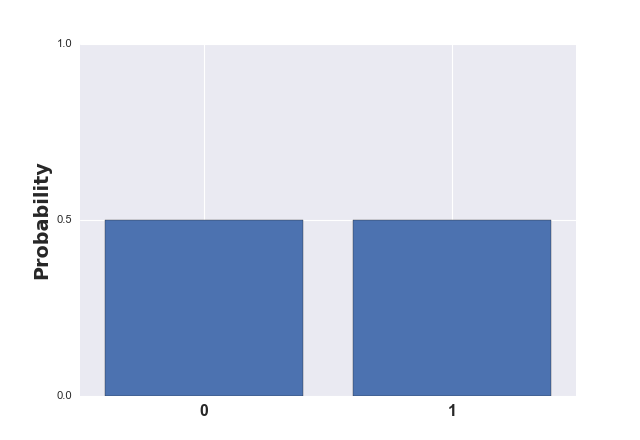

In [67]:
plt.figure()
ax = plt.axes()
coinFlip = [0.5,0.5] 
plt.bar([-0.4,0.6],coinFlip);
probabilityPlot(ax,[0,1],0.5,['0','1'])

Where "1" means "getting one head" and "0" means "getting zero heads" (also known as a tails).

What are the possible outcomes when we toss a coin three times? A table appears below.


| First toss | Second Toss | Third Toss |
|:----------:|:-----------:|:----------:|
|      1     |      1      | 1          |
|      1     |      1      | 0          |
|      1     |      0      | 0          |
|      0     |      0      | 0          |
|      0     |      0      | 1          |
|      0     |      1      | 1          |
|      1     |      0      | 1          |
|      0     |      1      | 0          |

### Two Flips

As an intermediate step on the way to figuring out the chance we get two heads in three tosses, let's calculate the probability of getting zero, one, and two heads in two tosses.

How do we compute the probability of each of those outcomes? For an individual coin flip, the probability of a head or a tail is $1/2$.

The probability of any pair heads and then heads, heads and then tails, etc. is $1/2*1/2 = 1/4$. That is, when we're looking at the chance two independent outcomes both occur, we multiply the probabilities.

If we apply this to an outcome like "getting a heads and then a tails", we get the probability of *that particular way to get one head in two tosses*. To get the probability of an event like "getting one head in two tosses", we need to add up all the probabilities of the individual ways to get one head in two tosses.

That is, we first multiply two things together, then we add up the results. Is that starting to sound familiar?

Let's call the outcome of the first toss $A$ and the outcome of the second toss $B$. The total number of heads will be $C=A+B$. We can summarize the procedure describe in words above as

$$
p(C) = \sum_{A+B=C} p(A) \cdot p(B)
$$

If you've read the notebook [What's a Convolution?](What's%20a%20Convolution%3F.ipynb), that formula should look familiar! It's a convolution, where the two functions being convolved are the probability distributions of $A$ and $B$! If you're familiar with convolutions from elsewhere and don't recognize the above formula, Check out the aforementioned notebook for an explanation of the advantages of the non-standard format.

The resulting probability distribution over $C$, the number of heads in two tosses, looks like this:

<IPython.core.display.Javascript object>


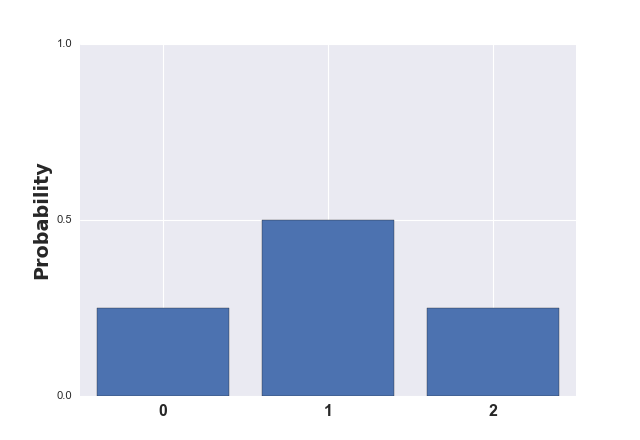

In [68]:
plt.figure()
ax = plt.axes()
plt.bar([-0.4,0.6,1.6],twoFlips);
probabilityPlot(ax,[0,1,2],0.5,['0','1','2'])

### Three Flips

With this probability distribution over the number of heads in two tosses, we can press forward and get the probability distribution over the number of heads in three tosses. In fact, we just do the same thing again!

Let's work through that idea slowly. First, we split our outcome after three tosses into two parts: the result of the first two tosses, and the result of the third toss. We'll call those components $C$ and $D$.

|  C | D |
|:--:|:-:|
| 2 | 1 |
| 2 | 0 |
| 1 | 1 |
| 1 | 0 |
| 0 | 1 |
| 0 | 0 |

We can find the probability of any given combination by multiplying together the probabilities of its components $C$ and $D$, and then find the probability of our outcome $E$ by taking all the combinations $C$ and $D$ that give us the result $E$:

$$
p(E) = \sum_{C+D=E} p(C) \cdot p(D)
$$

Notice that the distribution for $D$ is the same as the distribution for $A$ and  fpr$B$ -- they all describe the result of a single coin toss. Note also that we got $p(C)$, the other component of this equation, by convolving this coin flip distribution with itself. So if we wanted to succinctly describe $p(E)$, we could say that you get it by convolving the probability distribution for a single coin toss with itself twice -- once to get $p(C)$ and a second time to get $p(E)$.

This applies for any number of repetitions! If we want to know how likely it is to get any particular number $k$ of heads in some number of coin tosses $n$, we just need to look at the $n$th convolution of the coin flip probability distribution with itself!

Even further, nothing we talked about above was unique to coin flips. Look back at the original table of outcomes. Notice how the number of heads in a sequence of tosses is just the sum of the numbers in that row? What we calculate using the convolution is the distribution of the *sum* of a collection of random numbers independently generated from the distributions being convolved.

The code block calculates the distribution you get from adding up a certain number random values drawn from the same distribution, showing you the result of each convolution in turn. Feel free to change the argument `coinFlip` to any of the other distributions in the cell below. You can also change the number of iterations (try some 

## Demo

<IPython.core.display.Javascript object>


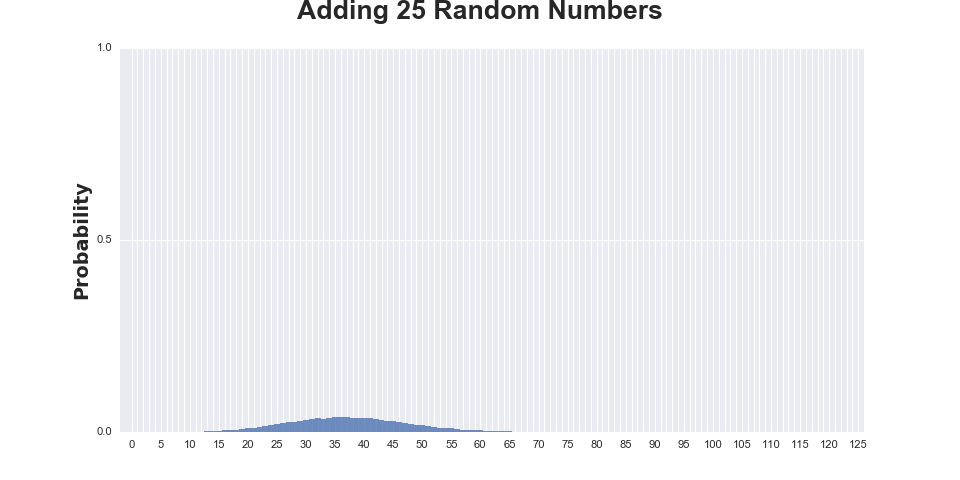

In [80]:
# other example distributions
twoFlips = [0.25,0.5,0.25]
d6Roll = [0]+[1/6]*6 # a six-sided die.
d20Roll = [0]+[1/20]*20 # roll for initiative!
wonky = [1/2,1/4,0,0,0,2/8] # a very strange distribution

addingRandomNumbersDemo(wonky,iterations=25)

## Why Do We Care About Adding Random Numbers?

Apart from this somewhat artificial example, why would we care about these distributions we're calculating using convolutions?

If you've ever taken the mean of a dataset, then you should care! The values in our dataset are random numbers -- each time we run an experiment or collect some data, we get different values. When we calculate the mean, we have to first add them together. We then divide by the number of values in our dataset to get the mean. Dividing doesn't change the shape of a distribution, just the width. So the mean itself has a distribution -- we get a different, random value of the mean each time we run the same experiment or collect the same data -- and that distribution is given by repeatedly convolving the distribution that governs individual datapoints with itself (and then scaling by the number of datapoints).

Fortunately, this distribution, also known as the *sampling distribution of the mean* has a characteristic shape. If you haven't already, increase the number of iterations to 25 or more. Try each of the distributions in turn. You should see that the same basic shape results each time: a bell curve, also known as a *Gaussian distribution* or a *normal distribution*. The proof of this fact is known as the *Central Limit Theorem*, and most proofs use properties of convolution in order to demonstrate it.

These proofs go beyond the scope of this tutorial, but a quick sneak peak: the result of convolving two Gaussian distributions is another Gaussian distribution. That makes the family of Gaussians a *fixed-point* of the convolution operation. Any other pair of distributions (subject to technical restrictions) are moved closer to this fixed-point by convolution.